In [73]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [74]:
customer_acqusition = pd.read_csv('Customer Acqusition.csv')
customer_acqusition

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [75]:
repayment = pd.read_csv('Repayment.csv')
repayment

,SL No:,Customer,Month,Amount
0,NaN,A1,12-Jan-04,495414.75
1,2.0,A1,03-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06
3,4.0,A1,25-Jan-04,437555.12
4,5.0,A1,17-Jan-05,165972.88
...,...,...,...,...
1495,1496.0,A67,09-May-05,55638.77
1496,1497.0,A68,10-May-06,319836.49
1497,1498.0,A69,11-Jul-06,247628.45
1498,1499.0,A70,12-Aug-05,454016.51


In [76]:
spend = pd.read_csv('spend.csv')
spend

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


## 1. In the above dataset,

#### a. In case age is less than 18, replace it with mean of age values.

In [77]:
customer_acqusition['Age']=customer_acqusition['Age'].apply(lambda x :customer_acqusition.Age.mean() if x < 18 else x)
customer_acqusition

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed


#### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
#### (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [78]:
merged_df_spend=pd.merge(left=spend,right=customer_acqusition,on="Customer",how="inner")
merged_df_spend["customer spend"]=merged_df_spend.apply(lambda x : x["Limit"]*0.5 if x["Amount"] > x["Limit"] else x["Amount"],axis=1)
merged_df_spend

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment,customer spend
0,1,A1,12-Jan-04,JEWELLERY,485470.80,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,277,A7,3-May-06,AIR TICKET,305050.62,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,50000.50
1496,295,A7,23-Feb-05,CAMERA,314704.54,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,50000.50
1497,313,A7,12-Jan-04,AUTO,498358.28,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,50000.50
1498,331,A7,25-Jan-04,TRAIN TICKET,461282.47,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,50000.50


#### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [79]:
merge_df_repay=pd.merge(left=repayment,right=customer_acqusition,on="Customer",how="inner")
merge_df_repay["customer repayment"]=merge_df_repay.apply(lambda x:x["Limit"] if x["Amount"]>x["Limit"] else x["Amount"],axis=1)
merge_df_repay

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment,customer repayment
0,NaN,A1,12-Jan-04,495414.75,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,495414.75
1,2.0,A1,03-Jan-04,245899.02,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,245899.02
2,3.0,A1,15-Jan-04,259490.06,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,259490.06
3,4.0,A1,25-Jan-04,437555.12,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,437555.12
4,5.0,A1,17-Jan-05,165972.88,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,165972.88
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,277.0,A7,22-Nov-05,55108.71,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,55108.71
1496,295.0,A7,03-Dec-05,429700.12,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,100001.00
1497,313.0,A7,23-Feb-05,344628.72,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,100001.00
1498,331.0,A7,31-Mar-06,336264.37,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,100001.00


## 2. From the above dataset create the following summaries:

#### a. How many distinct customers exist?

In [80]:
print('Number of distinct customers:',merged_df_spend.Customer.nunique())

Number of distinct customers: 100


#### b. How many distinct categories exist?

In [81]:
print('Number of distinct categories:',merged_df_spend.Type.nunique())

Number of distinct categories: 15


#### c. What is the average monthly spend by customers?

In [82]:
spend.groupby('Customer')['Amount'].mean().round(2).sort_index(ascending=True).reset_index(name='avg monthly spend')

,Customer,avg monthly spend
0,A1,285705.71
1,A10,213745.81
2,A100,224786.88
3,A11,250957.09
4,A12,263969.38
...,...,...
95,A95,240401.50
96,A96,54729.66
97,A97,139018.26
98,A98,284521.06


#### d. What is the average monthly repayment by customers?

In [83]:
(repayment.groupby('Customer')['Amount'].mean().round(2)).sort_index(ascending=True).reset_index(name='avg monthly repayment')

,Customer,avg monthly repayment
0,A1,264093.98
1,A10,205313.75
2,A100,69551.19
3,A11,295051.89
4,A12,268863.23
...,...,...
95,A95,369405.96
96,A96,310992.30
97,A97,121874.90
98,A98,337815.57


#### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [84]:
merge_df_spend_repay=pd.merge(left=repayment,right=spend,on="Customer",how="inner",suffixes=('_repay','_spend'))
merge_df_spend_repay["Monthly Profit"]=merge_df_spend_repay["Amount_repay"]-merge_df_spend_repay["Amount_spend"]
merge_df_spend_repay["Interest Earned"]=merge_df_spend_repay["Monthly Profit"].apply(lambda x : x*0.029 if x>0 else 0).round(2)
merge_df_spend_repay

,SL No:,Customer,Month_repay,Amount_repay,Sl No:,Month_spend,Type,Amount_spend,Monthly Profit,Interest Earned
0,NaN,A1,12-Jan-04,495414.75,1,12-Jan-04,JEWELLERY,485470.80,9943.95,288.37
1,NaN,A1,12-Jan-04,495414.75,2,3-Jan-04,PETRO,410556.13,84858.62,2460.90
2,NaN,A1,12-Jan-04,495414.75,3,15-Jan-04,CLOTHES,23740.46,471674.29,13678.55
3,NaN,A1,12-Jan-04,495414.75,4,25-Jan-04,FOOD,484342.47,11072.28,321.10
4,NaN,A1,12-Jan-04,495414.75,5,17-Jan-05,CAMERA,369694.07,125720.68,3645.90
...,...,...,...,...,...,...,...,...,...,...
37279,349.0,A7,03-Jan-04,473662.61,277,3-May-06,AIR TICKET,305050.62,168611.99,4889.75
37280,349.0,A7,03-Jan-04,473662.61,295,23-Feb-05,CAMERA,314704.54,158958.07,4609.78
37281,349.0,A7,03-Jan-04,473662.61,313,12-Jan-04,AUTO,498358.28,-24695.67,0.00
37282,349.0,A7,03-Jan-04,473662.61,331,25-Jan-04,TRAIN TICKET,461282.47,12380.14,359.02


#### f. What are the top 5 product types?

In [85]:
spend.groupby("Type")["Amount"].sum().sort_values(ascending=False).nlargest(5).reset_index(name="Total Amount")

,Type,Total Amount
0,PETRO,49863174.09
1,CAMERA,41481571.96
2,FOOD,37773338.43
3,TRAIN TICKET,33067077.15
4,AIR TICKET,32955445.42


#### g. Which city is having maximum spend?

In [86]:
merge_df_max_city=pd.merge(left=customer_acqusition,right=spend,on="Customer",how="inner")
merge_df_max_city=merge_df_max_city.groupby("City")["Amount"].sum()
merge_df_max_city=merge_df_max_city.idxmax()
print("city is having maximum spend:",merge_df_max_city)

city is having maximum spend: COCHIN


#### h. Which age group is spending more money?

In [87]:
merge_df_age=pd.merge(left=customer_acqusition[['Customer','Age']],right=spend,on="Customer",how="inner")
age_bins = [18, 30, 40, 50, 60, 70, 120]
age_labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
merge_df_age['Age_Group'] = pd.cut(merge_df_age['Age'], bins=age_bins, labels=age_labels, right=False)
merge_df_age=merge_df_age.groupby('Age_Group')['Amount'].sum()
merge_df_age=merge_df_age.idxmax()
print("Age group is spending more money:",merge_df_age)

Age group is spending more money: 18-29


#### i. Who are the top 10 customers in terms of repayment?

In [88]:
repayment.groupby("Customer")["Amount"].sum().nlargest(10).reset_index(name="Total Amount")

,Customer,Total Amount
0,A61,10539142.91
1,A60,9876290.74
2,A13,9572000.66
3,A22,9372561.68
4,A21,9056336.15
5,A43,8489871.46
6,A45,8448334.87
7,A12,8334760.16
8,A48,8292416.75
9,A14,7943268.63


## 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [89]:
merge_df_spend_cust=pd.merge(left=spend,right=customer_acqusition,on="Customer",how="inner")
merge_df_spend_cust["Month"]=pd.to_datetime(merge_df_spend_cust["Month"])
merge_df_spend_cust["Year"]=merge_df_spend_cust["Month"].dt.year

C:\Users\soura\AppData\Local\Temp\ipykernel_6336\3649415957.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merge_df_spend_cust["Month"]=pd.to_datetime(merge_df_spend_cust["Month"])


In [90]:
pivot_spend_cust = merge_df_spend_cust.pivot_table(values="Amount",index="City",columns=["Year","Product"],aggfunc="sum")
pivot_spend_cust

Year              2004                                 2005               \
Product           Gold    Platimum      Silver         Gold     Platimum   
City                                                                       
BANGALORE   9289878.54  6046763.93  6773901.65  12892362.99   7784194.68   
BOMBAY      6987853.53  5199581.00  3061805.08   8983018.28   5134074.48   
CALCUTTA    7477140.98  5961165.93  3321963.10  10303355.80   8810284.03   
CHENNAI     1059618.50  5558572.68  1156129.37   3740945.58   8868435.43   
COCHIN      7315850.15  8472832.23  4587738.70  12110613.03  10856722.82   
DELHI       2806495.00  1565199.90  4293224.28   1964845.27   2068490.16   
PATNA       2072567.90  1113069.60  3398795.65   3252615.77   2883231.07   
TRIVANDRUM  2415102.84  3761433.87   795897.19   1240375.85   7186762.35   

Year                           2006                           
Product         Silver         Gold     Platimum      Silver  
City                                                          
BANGALORE   3936068.22  12030611.09   5620904.86  4967945.66  
BOMBAY      2368375.97   7917144.31   7547549.72  3628864.37  
CALCUTTA    1285609.11  11167532.77  11305526.03  4783182.26  
CHENNAI     1000540.48   2704288.62   6921130.79  1665326.62  
COCHIN      2619231.25  10499142.38  12453968.83  4579249.87  
DELHI       2515127.59   2957103.32    764247.73  4581831.29  
PATNA       5244763.90   2276181.69   1256137.65  3111911.31  
TRIVANDRUM  1445540.63   2735710.87   4174473.45  2005942.36

<Figure size 1200x600 with 0 Axes>

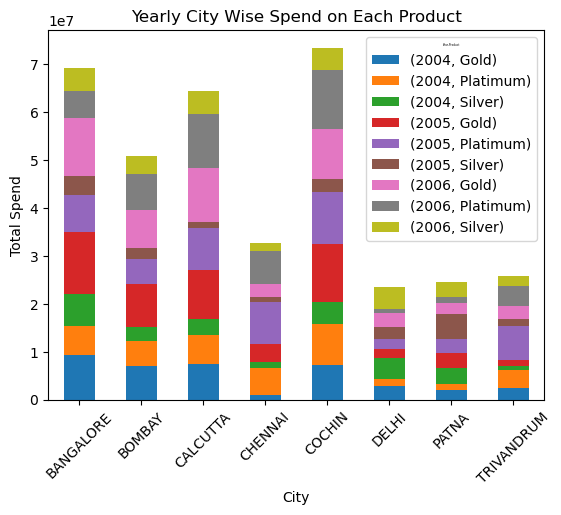

In [91]:
plt.figure(figsize=(12,6))
pivot_spend_cust.plot(kind='bar', stacked=True)
plt.title("Yearly City Wise Spend on Each Product")
plt.xlabel('City')
plt.ylabel('Total Spend')
plt.legend(title='Year,Product', title_fontsize='2', loc='upper right')
plt.xticks(rotation=45)
plt.show()

## 4. Create graphs for

In [92]:
customer_acqusition_repayment = pd.merge(left=repayment,right=customer_acqusition,on='Customer',how='inner')
customer_acqusition_repayment

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
0,NaN,A1,12-Jan-04,495414.75,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2.0,A1,03-Jan-04,245899.02,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,3.0,A1,15-Jan-04,259490.06,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,4.0,A1,25-Jan-04,437555.12,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,5.0,A1,17-Jan-05,165972.88,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...
1495,277.0,A7,22-Nov-05,55108.71,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1496,295.0,A7,03-Dec-05,429700.12,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1497,313.0,A7,23-Feb-05,344628.72,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1498,331.0,A7,31-Mar-06,336264.37,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC


In [93]:
customer_acqusition_spend = pd.merge(left=spend,right=customer_acqusition,on='Customer',how='inner')
customer_acqusition_spend

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment
0,1,A1,12-Jan-04,JEWELLERY,485470.80,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A1,3-Jan-04,PETRO,410556.13,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,3,A1,15-Jan-04,CLOTHES,23740.46,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,4,A1,25-Jan-04,FOOD,484342.47,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,5,A1,17-Jan-05,CAMERA,369694.07,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,277,A7,3-May-06,AIR TICKET,305050.62,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1496,295,A7,23-Feb-05,CAMERA,314704.54,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1497,313,A7,12-Jan-04,AUTO,498358.28,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1498,331,A7,25-Jan-04,TRAIN TICKET,461282.47,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC


In [94]:
spend_repay=pd.merge(left=repayment,right=spend,on="Customer",how="inner",suffixes=('_repay','_spend'))
spend_repay

,SL No:,Customer,Month_repay,Amount_repay,Sl No:,Month_spend,Type,Amount_spend
0,NaN,A1,12-Jan-04,495414.75,1,12-Jan-04,JEWELLERY,485470.80
1,NaN,A1,12-Jan-04,495414.75,2,3-Jan-04,PETRO,410556.13
2,NaN,A1,12-Jan-04,495414.75,3,15-Jan-04,CLOTHES,23740.46
3,NaN,A1,12-Jan-04,495414.75,4,25-Jan-04,FOOD,484342.47
4,NaN,A1,12-Jan-04,495414.75,5,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...
37279,349.0,A7,03-Jan-04,473662.61,277,3-May-06,AIR TICKET,305050.62
37280,349.0,A7,03-Jan-04,473662.61,295,23-Feb-05,CAMERA,314704.54
37281,349.0,A7,03-Jan-04,473662.61,313,12-Jan-04,AUTO,498358.28
37282,349.0,A7,03-Jan-04,473662.61,331,25-Jan-04,TRAIN TICKET,461282.47


#### a. Monthly comparison of total spends, city wise

In [95]:
customer_acqusition_spend["Month"]=pd.to_datetime(customer_acqusition_spend["Month"])
customer_acqusition_spend["month"]=customer_acqusition_spend["Month"].dt.month

monthly_spend_citywise=pd.pivot_table(customer_acqusition_spend,values="Amount",index="month",columns="City",aggfunc="sum")
monthly_spend_citywise

C:\Users\soura\AppData\Local\Temp\ipykernel_6336\2508866237.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_acqusition_spend["Month"]=pd.to_datetime(customer_acqusition_spend["Month"])


City,BANGALORE,BOMBAY,CALCUTTA,CHENNAI,COCHIN,DELHI,PATNA,TRIVANDRUM
month,,,,,,,,
1,17782487.66,10681854.60,14163384.38,7649568.68,18692606.60,7373794.37,7388720.78,5688758.54
2,9875860.87,7813534.61,11449586.70,5866408.35,9459367.08,3072043.85,3466726.76,4459329.30
3,10765773.46,9857699.82,10076115.86,4413870.52,10733411.24,3386628.30,3795753.30,3855833.54
4,6182081.72,3726382.34,6883832.96,3231144.38,7070107.83,2845176.75,2786278.83,2775772.32
5,10743668.90,6974931.87,7868030.30,4422623.36,9912248.75,2638193.66,3476601.00,4631877.09
6,1382739.41,1486412.18,2693423.54,1903803.90,2738031.53,828262.78,1653183.92,828576.89
7,3737413.09,612457.59,2323261.43,1186667.37,1758023.02,488399.04,191003.23,960551.29
8,1552898.45,1066744.75,2179294.85,681577.16,2582997.08,475893.81,813559.15,561400.55
9,1306412.01,1835082.87,2208767.98,1591669.63,1739644.69,245802.04,70329.95,215826.30


<Figure size 1200x600 with 0 Axes>

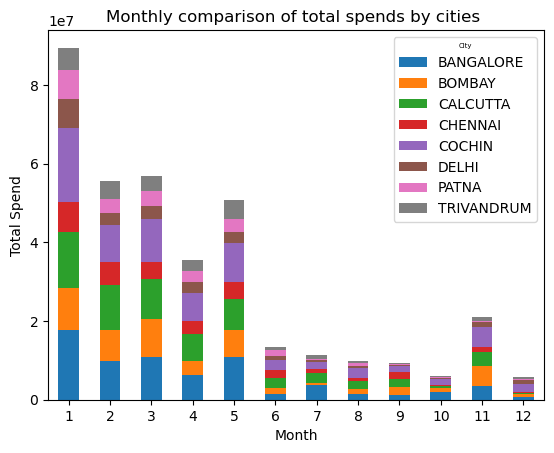

In [96]:
plt.figure(figsize=(12, 6))
monthly_spend_citywise.plot(kind='bar', stacked=True)
plt.title("Monthly comparison of total spends by cities ")
plt.xlabel('Month')
plt.ylabel('Total Spend')
plt.legend(title='City', title_fontsize='5', loc='upper right')
plt.xticks(rotation=0)
plt.show()

#### b. Comparison of yearly spend on air tickets

In [97]:
customer_acqusition_spend['year'] = customer_acqusition_spend['Month'].dt.year
yearly_spend_airtickets=customer_acqusition_spend[(customer_acqusition_spend["Type"]=="AIR TICKET")]
yearly_spend_table=yearly_spend_airtickets.pivot_table(values="Amount",index="year",columns="Type",aggfunc="sum")
yearly_spend_table

Type,AIR TICKET
year,
2004,8370914.59
2005,14495718.73
2006,10088812.10


(array([0, 1, 2]),
 [Text(0, 0, '2004'), Text(1, 0, '2005'), Text(2, 0, '2006')])

<Figure size 600x600 with 0 Axes>

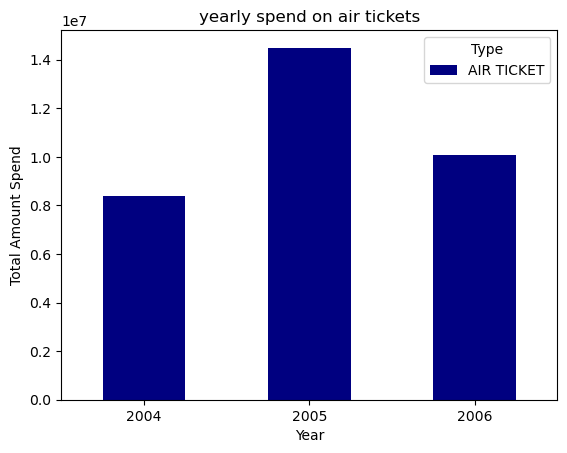

In [98]:
plt.figure(figsize=(6,6))
yearly_spend_table.plot(kind="bar",color="navy")
plt.title("yearly spend on air tickets")
plt.xlabel("Year")
plt.ylabel("Total Amount Spend")
plt.xticks(rotation=0)

#### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [99]:
monthly_spend_for_prod=customer_acqusition_spend.pivot_table(values="Amount",index="Product",columns="month",aggfunc="sum")
monthly_spend_for_prod

month,1,2,3,4,5,6,7,8,9,10,11,12
Product,,,,,,,,,,,,
Gold,32413831.83,24779179.55,19256972.48,13170572.59,21548169.76,6538862.64,5167416.37,4954030.42,3816887.62,3018223.38,9203267.46,2332940.96
Platimum,35212526.96,22081411.74,22639437.70,12798498.34,19380600.97,4756418.62,3695098.37,3892605.15,3411278.13,2517051.91,7977852.48,2951972.85
Silver,21794816.82,8602266.23,14988675.86,9531706.20,9739404.20,2219152.89,2395261.32,1067730.23,1985369.72,494594.37,3743265.31,566722.76


(array([0, 1, 2]),
 [Text(0, 0, 'Gold'), Text(1, 0, 'Platimum'), Text(2, 0, 'Silver')])

<Figure size 600x300 with 0 Axes>

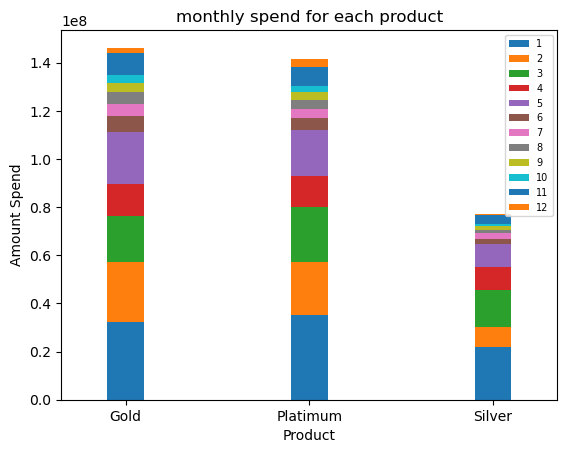

In [100]:
plt.figure(figsize=(6,3))
monthly_spend_for_prod.plot(kind="bar",stacked=True,width=0.2)
plt.title("monthly spend for each product")
plt.xlabel("Product")
plt.ylabel("Amount Spend")
plt.legend(loc="upper right",fontsize=7)
plt.xticks(rotation=0)

## 5. Write user defined PYTHON function to perform the following analysis:

#### You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [101]:
customer_acqusition_repayment["Month"]=pd.to_datetime(customer_acqusition_repayment["Month"])
def top_customers_by_city(customer_acqusition_repayment, city, product, time_period):
    filtered_data = customer_acqusition_repayment[(customer_acqusition_repayment['City'] == city) & (customer_acqusition_repayment['Product'] == product)]
    if time_period == 'yearly':
        filtered_data['Time Period'] = customer_acqusition_repayment["Month"].dt.year
    elif time_period == 'monthly':
        filtered_data['Time Period'] = customer_acqusition_repayment["Month"].dt.month
    else:
        return "Invalid time period specified. Please choose 'yearly' or 'monthly'."
    grouped_data = filtered_data.groupby(['Customer', 'Time Period','City'])['Amount'].sum().reset_index()

    top_customers = grouped_data.nlargest(10, 'Amount').reset_index(drop=True)

    return top_customers

city = 'CALCUTTA'
product = 'Gold' 
time_period = 'monthly' 

top_customers_by_city(customer_acqusition_repayment, city, product, time_period)

C:\Users\soura\AppData\Local\Temp\ipykernel_6336\826906002.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_acqusition_repayment["Month"]=pd.to_datetime(customer_acqusition_repayment["Month"])
C:\Users\soura\AppData\Local\Temp\ipykernel_6336\826906002.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Time Period'] = customer_acqusition_repayment["Month"].dt.month


,Customer,Time Period,City,Amount
0,A29,5,CALCUTTA,2612139.63
1,A60,1,CALCUTTA,2465584.81
2,A60,4,CALCUTTA,2397565.91
3,A15,5,CALCUTTA,1953768.97
4,A15,3,CALCUTTA,1738696.08
5,A29,1,CALCUTTA,1474900.52
6,A31,5,CALCUTTA,1432949.95
7,A60,2,CALCUTTA,1403731.08
8,A29,3,CALCUTTA,1269579.93
9,A60,5,CALCUTTA,1189900.27
